In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

 

In [2]:
# Load the dataset
data = pd.read_csv('US.csv')

 

In [3]:
# Display the first few rows and column names
print(data.head())
print(data.columns)

     State Atmospheric Condition  Crash Date  Fatalities in crash  \
0   Alaska                 Clear  2011-01-05                    1   
1   Alaska                 Clear  2011-01-05                    1   
2  Arizona                 Clear  2011-01-01                    1   
3  Arizona                 Clear  2011-01-01                    1   
4  Arizona                 Clear  2011-01-01                    1   

                               Roadway   Age  Alcohol Results  \
0  Rural-Principal Arterial-Interstate  27.0              0.0   
1  Rural-Principal Arterial-Interstate  60.0              0.0   
2       Urban-Other Principal Arterial  24.0              NaN   
3       Urban-Other Principal Arterial  27.0              0.0   
4       Urban-Other Principal Arterial  82.0              0.0   

                                 Person Type Drug Involvement     Race  \
0     Driver of a Motor Vehicle In-Transport              Yes      NaN   
1     Driver of a Motor Vehicle In-Transport  

In [4]:
# Convert 'Crash Date' to datetime
data['Crash Date'] = pd.to_datetime(data['Crash Date'])


In [5]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

State                         0
Atmospheric Condition         0
Crash Date                    0
Fatalities in crash           0
Roadway                       0
Age                          70
Alcohol Results            2706
Person Type                   0
Drug Involvement              0
Race                       2679
Gender                        0
Injury Severity               0
Crash Date.year               0
Crash Date.month              0
Crash Date.day-of-month       0
Crash Date.day-of-week        0
dtype: int64


In [6]:
# Fill missing values or handle them appropriately
data = data.fillna({'Alcohol Results': 'Not Reported', 'Drug Involvement': 'Not Reported', 'Race': 'Unknown', 'Gender': 'Unknown'})


In [7]:
# Drop unnecessary columns or irrelevant data
data = data.drop(columns=['Crash Date.year'])  # Dropped as it's redundant with 'Crash Date'


In [8]:
# Ensure correct data types
data['Crash Date.month'] = data['Crash Date.month'].astype(int)
data['Crash Date.day-of-month'] = data['Crash Date.day-of-month'].astype(int)
data['Crash Date.day-of-week'] = data['Crash Date.day-of-week'].astype(int)

In [9]:
# Basic statistics
print(data.describe())


                          Crash Date  Fatalities in crash          Age  \
count                           4999          4999.000000  4929.000000   
mean   2011-02-28 05:20:36.487297536             1.138628    38.608237   
min              2011-01-01 00:00:00             1.000000     0.000000   
25%              2011-01-13 00:00:00             1.000000    22.000000   
50%              2011-02-03 00:00:00             1.000000    36.000000   
75%              2011-03-18 00:00:00             1.000000    53.000000   
max              2011-12-29 00:00:00             5.000000    98.000000   
std                              NaN             0.425039    20.305162   

       Crash Date.month  Crash Date.day-of-month  Crash Date.day-of-week  
count       4999.000000              4999.000000             4999.000000  
mean           2.508702                13.647930                4.245849  
min            1.000000                 1.000000                1.000000  
25%            1.000000          

In [10]:
# Distribution of accident severity
print(data['Injury Severity'].value_counts())



Injury Severity
Fatal Injury (K)                         2319
No Injury (O)                             997
Non-incapacitating Evident Injury (B)     684
Incapacitating Injury (A)                 583
Possible Injury (C)                       382
Unknown                                    26
Injured, Severity Unknown                   8
Name: count, dtype: int64


In [11]:
# Distribution of atmospheric conditions
print(data['Atmospheric Condition'].value_counts())


Atmospheric Condition
Clear                                     3220
Cloudy                                     845
Snow                                       379
Rain                                       309
Sleet, Hail (Freezing Rain or Drizzle)      96
Fog, Smog, Smoke                            65
Blowing Snow                                50
Severe Crosswinds                           12
Not Reported                                11
Unknown                                      6
Other                                        5
Blowing Sand, Soil, Dirt                     1
Name: count, dtype: int64


In [12]:
# Distribution by state
print(data['State'].value_counts())

State
Wyoming                 129
Arizona                 123
Colorado                121
Idaho                   115
Minnesota               115
New Mexico              113
Texas                   110
Washington              110
Arkansas                110
Alabama                 110
Kentucky                108
Utah                    108
Oregon                  108
Delaware                106
Kansas                  106
South Carolina          105
Hawaii                  103
California              102
Illinois                102
New Hampshire           102
Florida                 102
Michigan                102
South Dakota            102
Montana                 101
Alaska                  100
West Virginia            99
Maryland                 99
Wisconsin                98
Ohio                     98
Tennessee                97
North Carolina           96
Connecticut              96
Indiana                  96
Mississippi              95
Nebraska                 94
Massachusetts 

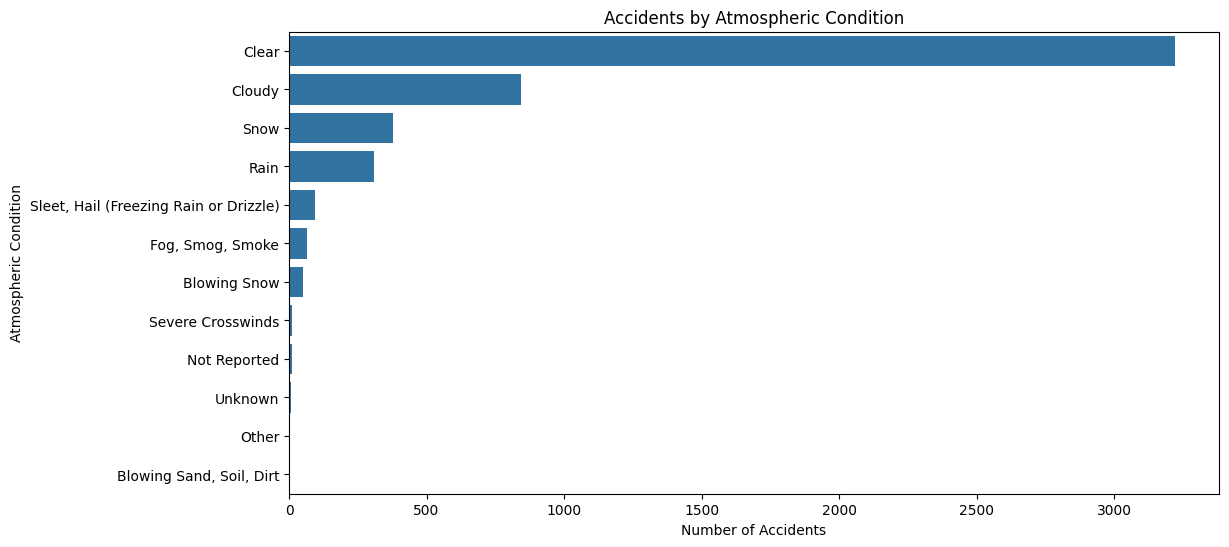

In [13]:

# Accident counts by atmospheric condition
plt.figure(figsize=(12, 6))
sns.countplot(y='Atmospheric Condition', data=data, order=data['Atmospheric Condition'].value_counts().index)
plt.title('Accidents by Atmospheric Condition')
plt.xlabel('Number of Accidents')
plt.ylabel('Atmospheric Condition')
plt.show()

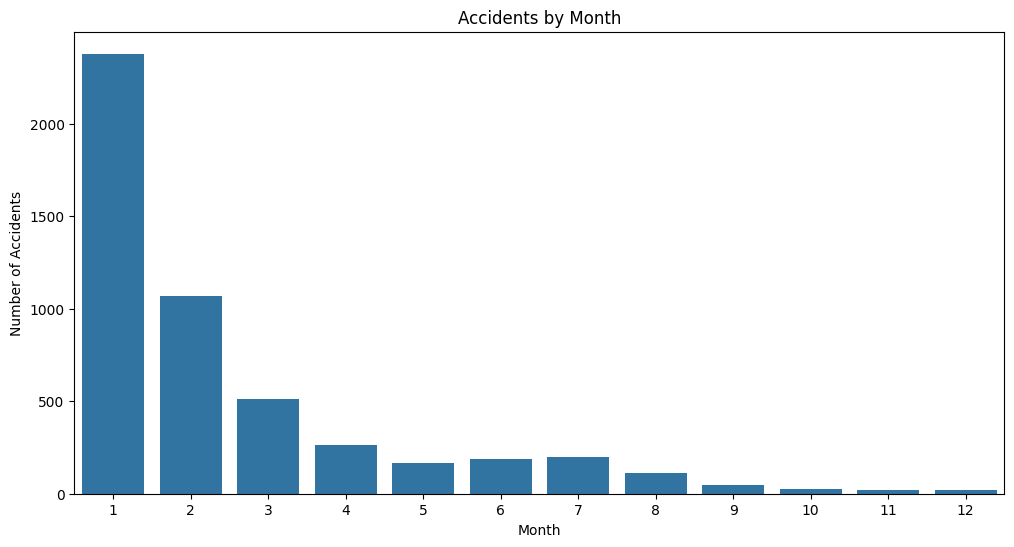

In [14]:
# Plot accidents by month
plt.figure(figsize=(12, 6))
sns.countplot(x='Crash Date.month', data=data)
plt.title('Accidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()

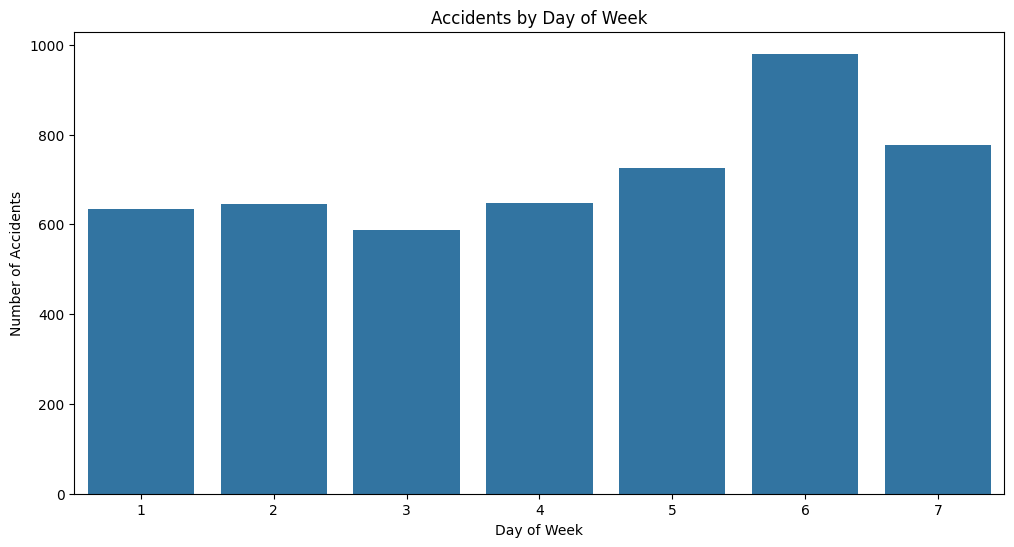

In [15]:
# Plot accidents by day of week
plt.figure(figsize=(12, 6))
sns.countplot(x='Crash Date.day-of-week', data=data, order=[1, 2, 3, 4, 5, 6, 7])
plt.title('Accidents by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Accidents')
plt.show()

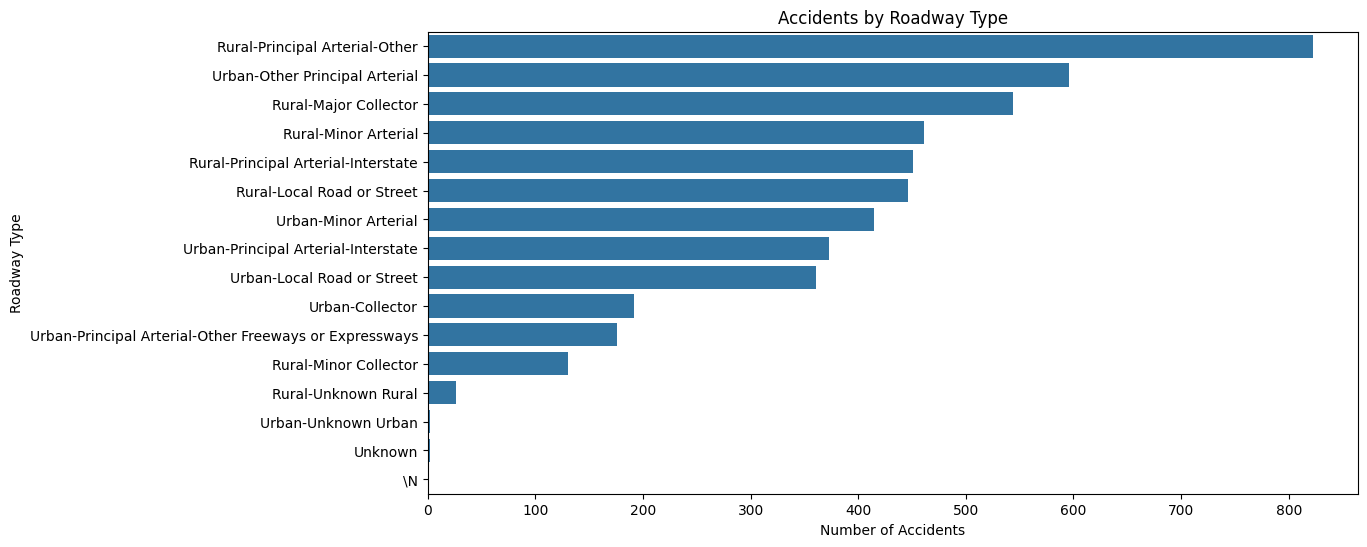

In [16]:
# Accident counts by roadway type
plt.figure(figsize=(12, 6))
sns.countplot(y='Roadway', data=data, order=data['Roadway'].value_counts().index)
plt.title('Accidents by Roadway Type')
plt.xlabel('Number of Accidents')
plt.ylabel('Roadway Type')
plt.show()

In [17]:
import folium

# Dummy coordinates for states (for visualization purposes)
state_coordinates = {
    'California': [36.7783, -119.4179],
    'Texas': [31.9686, -99.9018],
    'Florida': [27.7663, -81.6868],
    # Add coordinates for other states as needed
}

# Create a map centered around the average coordinates
map_center = [sum(lat for lat, lng in state_coordinates.values()) / len(state_coordinates),
              sum(lng for lat, lng in state_coordinates.values()) / len(state_coordinates)]
accident_map = folium.Map(location=map_center, zoom_start=5)

# Add state locations as markers
for state, coords in state_coordinates.items():
    folium.Marker(
        location=coords,
        popup=state,
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(accident_map)

# Save map as an HTML file
accident_map.save('state_accidents.html')

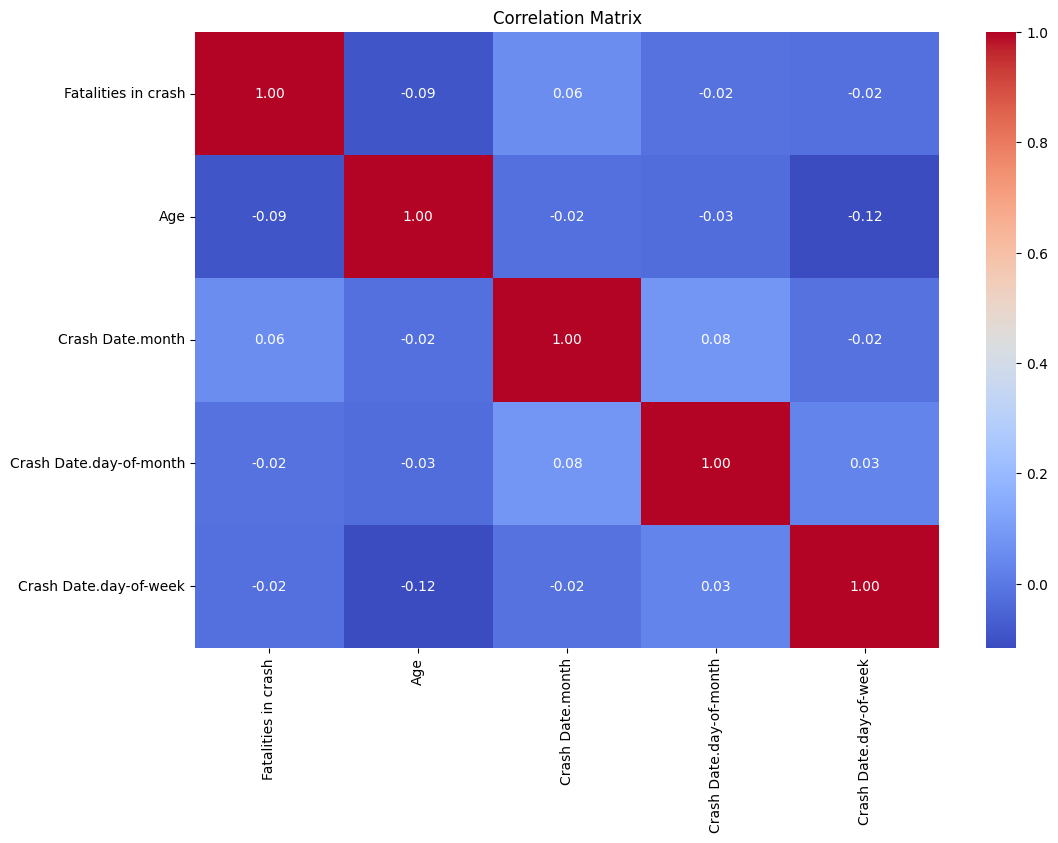

In [19]:
# Select numeric columns only
numeric_data = data.select_dtypes(include=['number'])

# Calculate correlations
correlation_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
